In [1]:
from functools import partial
from rasterio.windows import Window
import numpy as np

from dl_toolbox.normalizations import StretchToMinmaxCommon, ZeroAverageCommon
from dl_toolbox.datasources import Digitanie
from dl_toolbox.datasets import Raster
from dl_toolbox.augmentations import *

/home/pfournie/dl_toolbox/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
normalization = partial(
    StretchToMinmaxCommon,
    minval=[0,0,0,0],
    maxval=[1,1,1,1]
    #minval=[0.036,0.05,0.079,0],
    #maxval=[0.14,0.14,0.17,1]
)

src = Digitanie(
    bands=[1,2,3],
    image_path='/mnt/d/pfournie/Documents/data/DIGITANIE_v3/Toulouse/Toulouse_EPSG32631_5.tif',
    zone=Window(0, 0, 2000, 2000),
    label_path='/mnt/d/pfournie/Documents/data/DIGITANIE_v3/Toulouse/COS9/Toulouse_5.tif',
    nomenclature_name='main',
    normalization=normalization
)

standardize = partial(
    ZeroAverageCommon,
    #meanval=[0.123, 0.133, 0.144, 0.197]
    meanval=[0, 0, 0, 0]
)

transform = Brightness(bounds=(1,1), p=0)
    
ds = Raster(
    data_src=src,
    crop_size=256,
    standardize=standardize,
    transforms=transform
)

float32
0.030693412 0.31705144


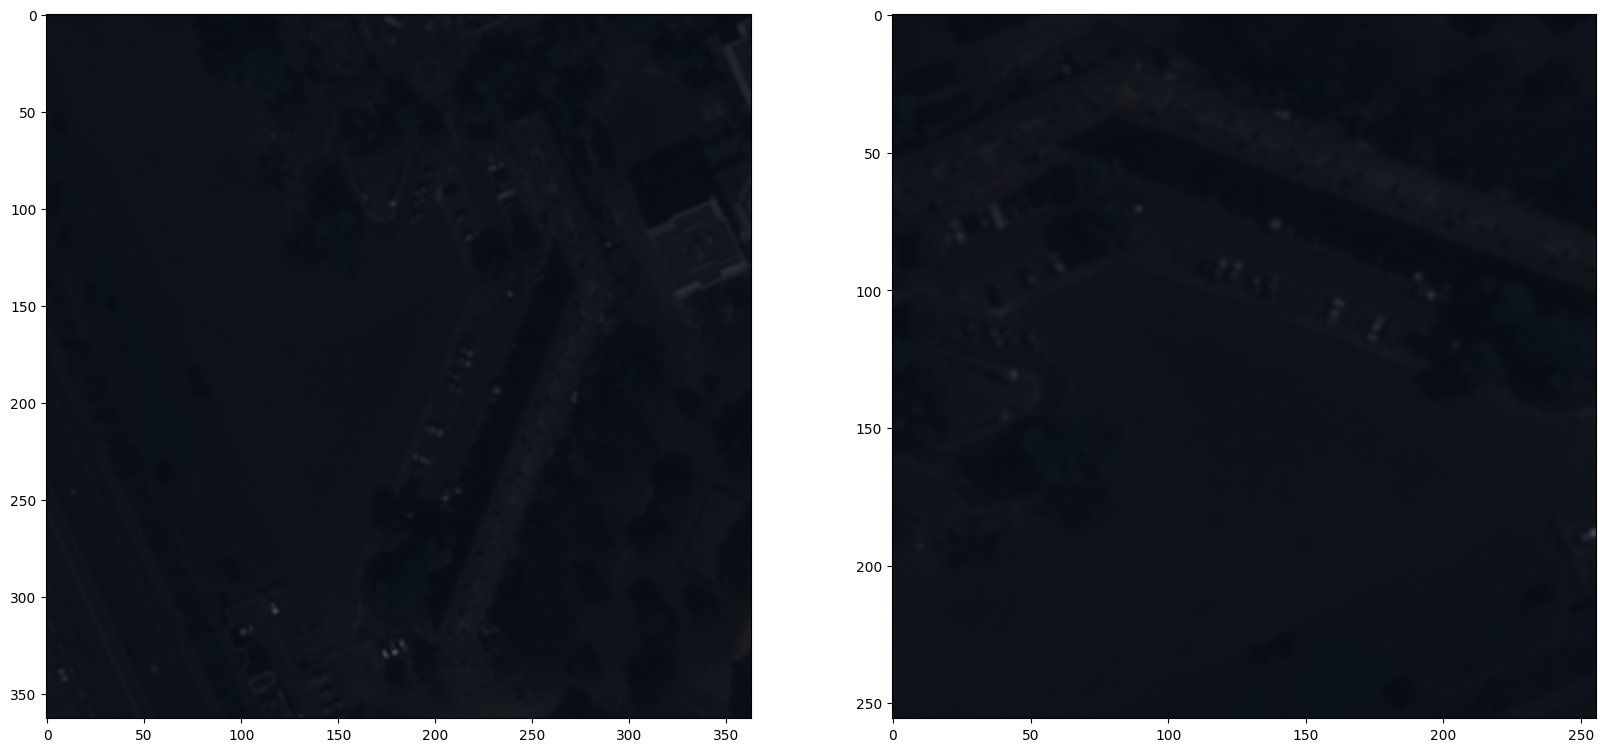

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
#from skimage import exposure

elem = ds[0]

pre_image =elem['pre_image']
pre_image = pre_image.numpy().transpose(1,2,0)
image = elem['image']
image = image.numpy().transpose(1,2,0)

print(image.dtype)
print(np.min(image), np.max(image))
#image = exposure.adjust_gamma(image, 0.3)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.imshow(pre_image)
ax2 = fig.add_subplot(122)
ax2.imshow(image)